# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [85]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline

In [86]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("map_box_api")
px.set_mapbox_access_token(map_box_api)


## Load Data

In [87]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [88]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_units = to_data.groupby('year').sum()
dwelling_units.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1, inplace= True)
dwelling_units

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [89]:
# Save the dataframe as a csv file
dwelling_units.to_csv('dwelling_units.csv')

In [90]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure,
    data = data.plot.bar(color=color)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    
    plt.show()
    
    return data

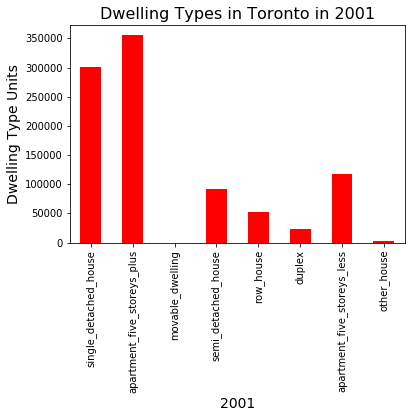

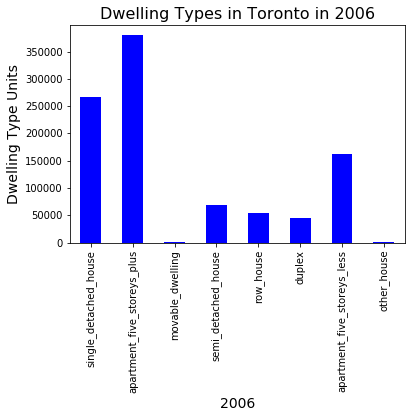

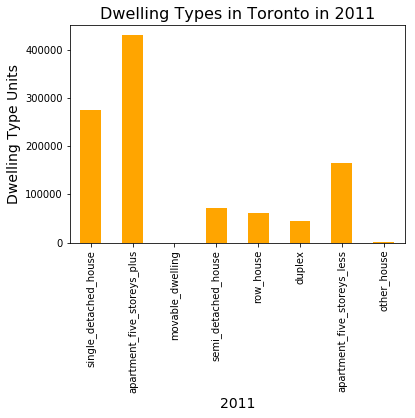

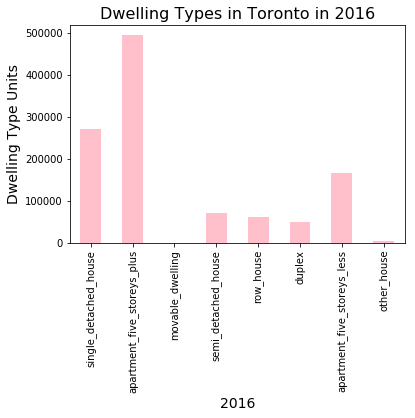

In [91]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001, 2006, 2011, 2016
dwelling_Types_in_toronto_2001 = create_bar_chart(dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units","red")
dwelling_Types_in_toronto_2006 = create_bar_chart(dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units","blue")
dwelling_Types_in_toronto_2011 = create_bar_chart(dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units","orange")
dwelling_Types_in_toronto_2016 = create_bar_chart(dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units","pink")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [92]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_monthlyCost = to_data[['shelter_costs_owned','shelter_costs_rented']].groupby('year').mean()
avg_monthlyCost

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [93]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    fig = plt.figure()
    data = data.plot.line(color=color)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    
    plt.show()
    return data

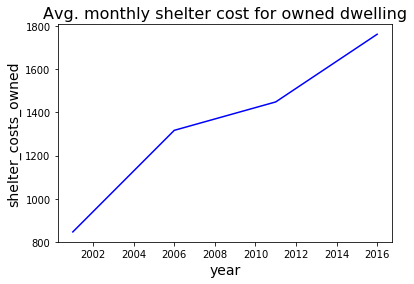

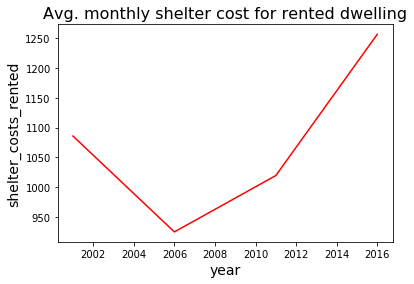

In [94]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(avg_monthlyCost.iloc[:,0],"Avg. monthly shelter cost for owned dwelling", "year", "shelter_costs_owned","blue")

# Line chart for rented dwellings
create_line_chart(avg_monthlyCost.iloc[:,1],"Avg. monthly shelter cost for rented dwelling", "year", "shelter_costs_rented","red")

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [95]:
# Calculate the average house value per year
avg_houseValue = to_data[['average_house_value']].groupby('year').mean()
avg_houseValue.head()

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


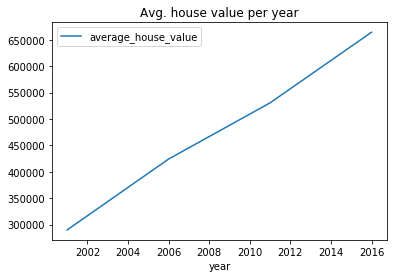

In [96]:
# Plot the average house value per year as a line chart
avg_houseValue.plot.line(title="Avg. house value per year")


- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [97]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_houseValue_neighbour = to_data.reset_index()


In [98]:
avg_houseValue_neighbour.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [99]:
avg_houseValue_neighbourhood = avg_houseValue_neighbour[['year','neighbourhood','average_house_value']]
avg_houseValue_neighbourhood.head(10)


,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
5,2001,Bathurst Manor,304749
6,2001,Bay Street Corridor,257404
7,2001,Bayview Village,327644
8,2001,Bayview Woods-Steeles,343535
9,2001,Bedford Park-Nortown,565304


In [100]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_houseValue_neighbourhood.hvplot(x="year", y="average_house_value", groupby= "neighbourhood", yformatter='%.3f')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [101]:
# Fetch the data of all dwelling types per year
dwelling_types = to_data.groupby(['year','neighbourhood']).mean()
dwelling_types.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1, inplace= True)
dwelling_types

single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                                3715   
     Agincourt South-Malvern West                   3250   
     Alderwood                                      3175   
     Annex                                          1060   
     Banbury-Don Mills                              3615   
...                                                  ...   
2016 Wychwood                                        920   
     Yonge-Eglinton                                 1400   
     Yonge-St.Clair                                  520   
     York University Heights                        1235   
     Yorkdale-Glen Park                             2165   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                      1480   
     Agincourt South-Malvern West                         1835   
     Alderwood                                             315   
     Annex                                                6090   
     Banbury-Don Mills                                    4465   
...                                                        ...   
2016 Wychwood                                             1295   
     Yonge-Eglinton                                       1995   
     Yonge-St.Clair                                       4315   
     York University Heights                              5505   
     Yorkdale-Glen Park                                   1185   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                              0                 1055   
     Agincourt South-Malvern West                 0                  545   
     Alderwood                                    0                  470   
     Annex                                        5                 1980   
     Banbury-Don Mills                            0                  240   
...                                             ...                  ...   
2016 Wychwood                                     0                  880   
     Yonge-Eglinton                               0                  465   
     Yonge-St.Clair                               0                  450   
     York University Heights                      0                 1360   
     Yorkdale-Glen Park                           0                   80   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                    1295     195   
     Agincourt South-Malvern West        455     105   
     Alderwood                            50     185   
     Annex                               605     275   
     Banbury-Don Mills                   380      15   
...                                      ...     ...   
2016 Wychwood                            290     395   
     Yonge-Eglinton                       60     310   
     Yonge-St.Clair                      220     130   
     York University Heights             775     280   
     Yorkdale-Glen Park                  600     465   

                                   apartment_five_storeys_less  other_house  
year neighbourhood                                                           
2001 Agincourt North                                       185            5  
     Agincourt South-Malvern West                          425            0  
     Alderwood                                             370            0  
     Annex                                                3710          165  
     Banbury-Don Mills                                    1360            0  
...                                                        ...          ...  
2016 Wychwood                                        

In [102]:
dwelling_types = dwelling_types.reset_index(['neighbourhood','year'])


In [103]:
dwelling_types

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920,1295,0,880,290,395,2080,35
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
557,2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0
558,2016,York University Heights,1235,5505,0,1360,775,280,995,0


In [104]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_types.hvplot.bar(x='year', groupby='neighbourhood', rot=90, height=500, xlabel='Year', ylabel='Dwelling Type Units')

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [105]:
# Getting the data from the top 10 expensive neighbourhoods
top10_expensive = to_data.sort_values('average_house_value', ascending=False).head(10)
top10_expensive

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2016,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
2011,Bridle Path-Sunnybrook-York Mills,2285,480,0,45,100,30,50,0,1697067,2387,2388
2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809
2016,St.Andrew-Windfields,3245,1745,0,175,540,120,595,5,1390616,2516,1565
2016,Casa Loma,875,2680,0,265,200,155,1225,0,1365503,2434,1841
2006,Bridle Path-Sunnybrook-York Mills,2205,145,0,35,15,30,10,0,1356757,2170,2167
2011,Forest Hill South,1730,1825,0,65,45,75,1035,0,1329642,1959,1206


In [106]:
# Plotting the data from the top 10 expensive neighbourhoods
top10_expensive.hvplot.bar( x='neighbourhood', y='average_house_value', rot=90, height=700, width=700,xlabel='Neighbourhood', ylabel='Avg. House value', yformatter='$%.1f', title='Top 10 most expensive neighbourhood')

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [107]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
neighbourhood_locations = pd.read_csv(file_path)
neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [108]:
# Calculate the mean values for each neighborhood
avg_Housevalue_eachNeighbourhood = to_data.groupby([to_data["neighbourhood"]]).mean()
avg_Housevalue_eachNeighbourhood = avg_Housevalue_eachNeighbourhood.reset_index()
avg_Housevalue_eachNeighbourhood.head(10)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
5,Bathurst Manor,2131.25,1815.00,0.00,151.25,70.00,677.50,973.75,8.75,501576.75,1307.00,1059.50
6,Bay Street Corridor,3.75,10470.00,0.00,1.25,18.75,1.25,271.25,2.50,423653.50,1494.50,1436.75
7,Bayview Village,2101.25,3222.50,2.50,141.25,830.00,70.00,500.00,2.50,539258.75,1512.75,1422.00
8,Bayview Woods-Steeles,1585.00,1700.00,0.00,580.00,175.00,86.25,522.50,1.25,565413.50,1364.25,1399.50
9,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.50,1275.00,88.75,930415.25,1786.75,1255.00


In [109]:
# Join the average values with the neighbourhood locations
avgValues_bylocation = neighbourhood_locations.merge(avg_Housevalue_eachNeighbourhood, how="outer")
avgValues_bylocation.head()


,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

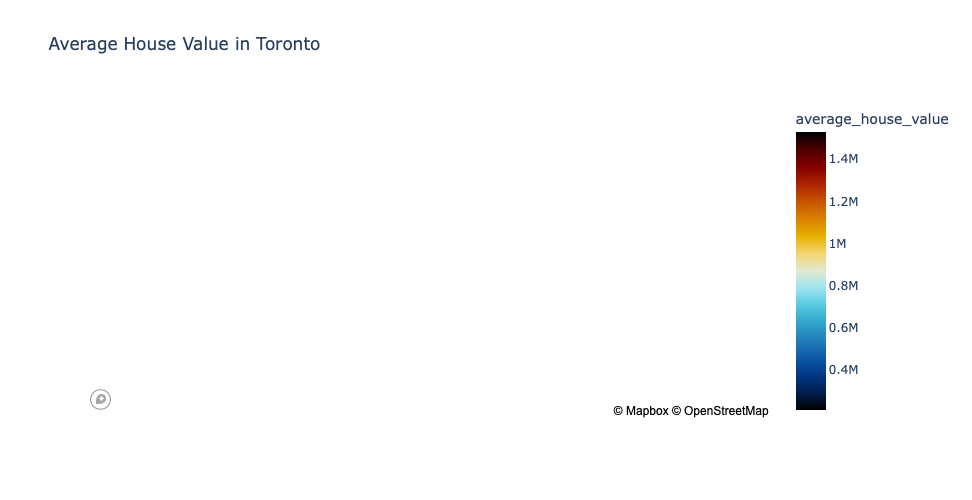

In [110]:
# Create a scatter mapbox to analyze neighbourhood info
#name = avgValues_bylocation[avgValues_bylocation["neighbourhood"]]

fig = px.scatter_mapbox(
    avgValues_bylocation,
    lat="lat",
    lon="lon",
    hover_name="neighbourhood",
    height=500,
    size="average_house_value",
    color="average_house_value",
    title="Average House Value in Toronto",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    zoom=9,
    size_max=15
)

fig.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [111]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [112]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [113]:
# Create the sunburst chart
# YOUR CODE HERE!